In [69]:
import sys
# import os
sys.path.append("pathto/utils")
import clus
import draw
import matplotlib.pyplot as plt
import scanpy as sc
import numpy as np 
import random 
# fix random seed
np.random.seed(1234)
random.seed(1234)

In [71]:
# load data and init paths for saving results
clus.initLogs("<path>")
adata = sc.read_h5ad("pathto/bin50/macaque1/T33.h5ad")
adata

AnnData object with n_obs × n_vars = 44894 × 15388
    obs: 'gene_area'
    obsm: 'spatial'

find high variable n= -1
finding neighbors n= 30
clustering using leiden resolution= 0.9


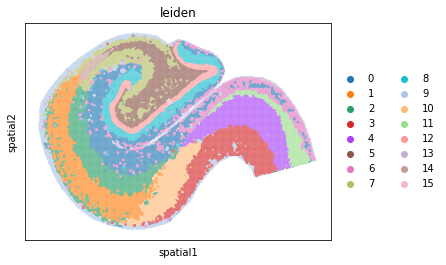

In [72]:
# do the clustering process
adata = clus.process(adata, s=0.45, high_variables=-1, neighbor=30, npc=30, resolution=0.9, smooth="smoothadata")
sc.pl.spatial(adata, color="leiden", spot_size=1)

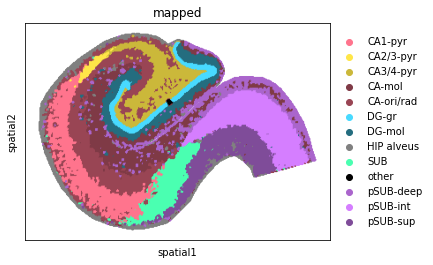

In [73]:
# annotate all clusters
adata.obs["mapped"] = adata.obs["leiden"].map({
    "0":"CA-mol", 
    "1":"CA1-pyr", 
    "2":"CA-ori/rad", 
    "3":"pSUB-sup",
    "4":"pSUB-int",
    "5":"CA3/4-pyr", 
    "6":"pSUB-deep",
    "7":"CA-ori/rad",
    "8":"DG-mol",
    "9":"HIP alveus",
    "10":"SUB",
    "11":"pSUB-int",
    "12":"DG-gr",
    "13":"pSUB-deep",
    "14":"CA2/3-pyr",
    "15":"other",
})
c = {
    "CA2/3-pyr": '#ffe648',
    "CA3/4-pyr": '#cbb83a',
    "CA-mol": '#7f3a46',
    "CA-ori/rad": '#994554',
    "CA1-pyr": '#ff748d',
    "DG-mol": '#246d7f',
    "DG-gr": '#48daff',
    "SUB": '#4affb1',
    "pSUB-sup": '#7f4c99',
    "pSUB-int": '#d57eff',
    "pSUB-deep": '#aa65cc',
    "other": '#000000',
    "HIP alveus": '#808080'
}

sc.pl.spatial(adata, color="mapped", spot_size=2, palette=c)
# adata.write_h5ad("./CA3/T573.h5ad")

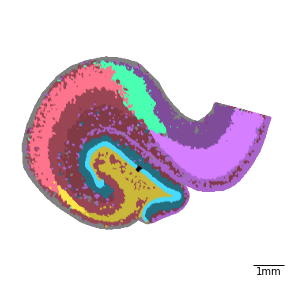

In [75]:
#draw the slice
axis = draw.drawSlice(adata, palette=c)
plt.savefig("<path>")

In [67]:
# save adata 
clus.saveadata(adata, "T33res")